## Implementation of Langton's Ant
#### This implementation requires use of the following python libraries: 
    - numpy, for creating and managing the 'space'
    - matplotlib, for visualizing the results
    - enum, to remove ambiguity regarding both relative and cardinal directions

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns
from enum import Enum

### Defining Initial Variables
    - x_lim and y_lim represent the x and y boundaries. 
    - start and current_position respectively define the initial and current positions of an ant. 
    - Space is a 2-d array initialized with all 0's.

In [2]:
# Definitions:
x_limit = 5000
y_limit = 5000
start = [2500,2500]
current_position = start
space = np.zeros(shape = (x_limit, y_limit))

This function resets start and space to initial condtitions

In [3]:
def initialize(space):
    start = [2500,2500]
    space = np.zeros(shape = (x_limit, y_limit))
    return start, space

### Defining the Enums
Enums are a defined set of symbolic names, these help clean out the implementation and remove ambiguity regarding directions. 
    - The 'Direction' enum contains all the possible directions that an ant can take.
    - The 'next_direction' enum contains the next relative step an ant can take

In [4]:
class direction(Enum):
    NORTH = "NORTH"
    SOUTH = "SOUTH"
    EAST = "EAST"
    WEST = "WEST"
class next_direction(Enum):
    LEFT = "LEFT"
    RIGHT = "RIGHT"

### The 'get_next_coords' function
This function uses the current_direction and determines the next_step to take and return the next_direction that an ant will be facing after this step. 

For example, if an ant were facing North at (10, 10) and had to turn left, this function would return (9, 10) and 'West'

In [5]:
def get_next_coords(next_coords, current_direction, next_step):
    if current_direction == direction.NORTH:
        if next_step == next_direction.LEFT:
            next_coords[0] = next_coords[0]-1
            next_heading = direction.WEST
        else:
            next_coords[0] = next_coords[0]+1
            next_heading = direction.EAST
    elif current_direction == direction.SOUTH:
        if next_step == next_direction.LEFT:
            next_coords[0]+=1 
            next_heading = direction.EAST
        else:
            next_coords[0]-=1
            next_heading = direction.WEST
    elif current_direction == direction.EAST:
        if next_step == next_direction.LEFT:
            next_coords[1]+=1
            next_heading = direction.NORTH
        else:
            next_coords[1]-=1
            next_heading = direction.SOUTH
    elif current_direction == direction.WEST:
        if next_step == next_direction.LEFT:
            next_coords[1]-=1
            next_heading = direction.SOUTH
        else:
            next_coords[1]+=1
            next_heading = direction.NORTH
    return next_coords, next_heading

### The 'run_ant' function
This function iterates over the given grid('space'), num_times starting from the initial given position('current_position'). 

It starts by setting the current direction to North. Then it iterates over the follwing steps:
    - check if current tile is 1 (represeting black)
        - if so, then set it to white, turn right and move forward
        - otherwise, set it to black, turn left and move forward

In [8]:
def run_ant(space, current_position, num_times):
    current_direction = direction.NORTH
    ones = 0
    for _ in range(num_times):
        if space[current_position[0]][current_position[1]] == 1:
            space[current_position[0]][current_position[1]] = 0
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.LEFT)
        elif space[current_position[0]][current_position[1]] == 0:
            ones = ones + 1
            space[current_position[0]][current_position[1]] = 1
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.RIGHT)
    return space

### Running the code
This snippet, initalizes the starting, current location and resets the space to be empty. It then calls 'run_ant' to iterate over the space 50000 times. 

In [9]:
start, space = initialize(space)
current_position = start
space = run_ant(space, current_position, 50000)

## Visualizing the results
#### Initial setup:
We first plot the entire grid and as we can see plotting the whole space does not give a very detailed picture of the results.

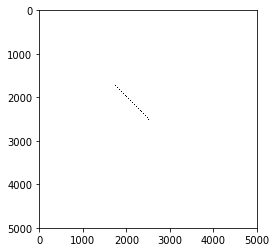

In [10]:
plt.imshow(space, cmap='Greys', interpolation='nearest')
plt.show()

#### Zooming in
We can get a rough idea of where to zoom in using the axis above. The following snippet restrains the x and y axis to a 200\*200 grid, giving a good visualization of the emergent results.

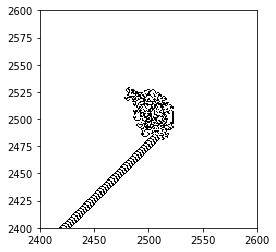

In [11]:
plt.imshow(space, cmap='Greys', interpolation='nearest')
plt.axis([2400,2600,2400,2600])
plt.show()

We can also zoom in further to focus on the results. The first plot here focuses on the randomness that is expected at start, and the second looks at the repeating pattern that emerges.

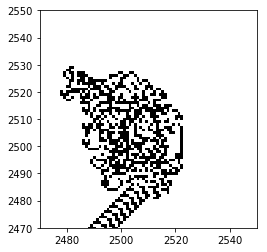

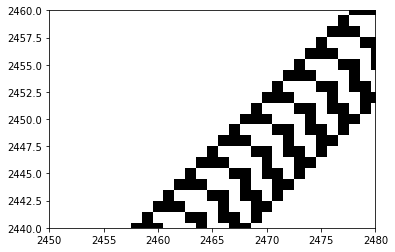

In [12]:
plt.imshow(space, cmap='Greys', interpolation='nearest')
plt.axis([2470,2550,2470,2550])
plt.show()
plt.imshow(space, cmap='Greys', interpolation='nearest')
plt.axis([2450,2480,2440,2460])
plt.show()

## Depth of Traversal
#### The 'run_ant_with_addition' function does the same things as the 'run_ant' function but instead of reversing the value present in tile, it increments it by 1 everytime an ant steps on it. The function alsp modifies the original invariant to turn right on a tile if it has stepped on it an odd number of times and left otherwise.

In [13]:
def run_ant_with_addition(space, current_position, num_times):
    current_direction = direction.NORTH
    ones = 0
    for _ in range(num_times):
        if space[current_position[0]][current_position[1]]%2 == 1:
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.LEFT)
        elif space[current_position[0]][current_position[1]]%2 == 0:
            current_position, current_direction = get_next_coords(current_position, current_direction, next_direction.RIGHT)
        space[current_position[0]][current_position[1]] += 1
    return space

In [15]:
start, space = initialize(space)
current_position = start
space = run_ant_with_addition(space, current_position, 90000)

### Visualizing Depth of Traversal
In this case, we will move away from black/white traversal and use a colour coded scheme to visualize the space. As we can see, similar to before if we just visualize the whole plot, it is too dim to see a pattern. So we zoom in, on doing that, we can see that in the random part of the movements, the center and north is the most highly visited, probably because of it being the initial point, and as we go into the repeated pattern we see almost a cyclic pattern where the center point is again brighter and the edges follow a pattern of having an equal and uniform amount of visits. The colors on zooming in are inverted because it presents a better visual.

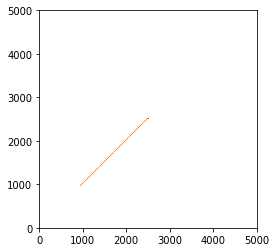

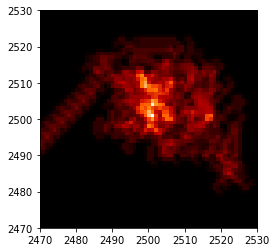

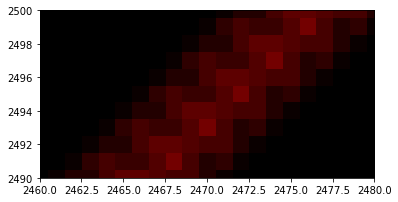

In [20]:
plt.imshow(space, interpolation='nearest', cmap = 'gist_heat_r')
plt.axis([0,5000,0,5000])
plt.show()
plt.imshow(space, interpolation='nearest', cmap = 'gist_heat')
plt.axis([2470,2530,2470,2530])
plt.show()
plt.imshow(space, interpolation='nearest', cmap = 'gist_heat')
plt.axis([2460,2480,2490,2500])
plt.show()

We can now looks at the counts or number of times that an ant steps on a tile.

In [21]:
counts = {}
for x in range(len(space[0])):
    for y in range(x):
        if space[x][y] not in counts:
            counts[int(space[x][y])]=1
        else:
            counts[int(space[x][y])]+=1
# There might be some values for which we have no count, lets add them
for x in range(len(counts)):
    counts.setdefault(x, 0)
print(counts[0], counts[1])
# As we will see 0 extrememly overshadows 1, so we will set it to 0
counts[0] = 0
# counts = sorted(counts.items())
# Value, Count = zip(*counts)

12479922 3161


Surpirsingly, on plotting the count of the times a value is incremented, 7 comes out on top, overshadowing even 1, this could be because the center island has some arbitrarily equal amount of 7 compared to other numbers near it and once the figure gets into the loop, 7 becomes the most common times an ant steps on a tile while in it.

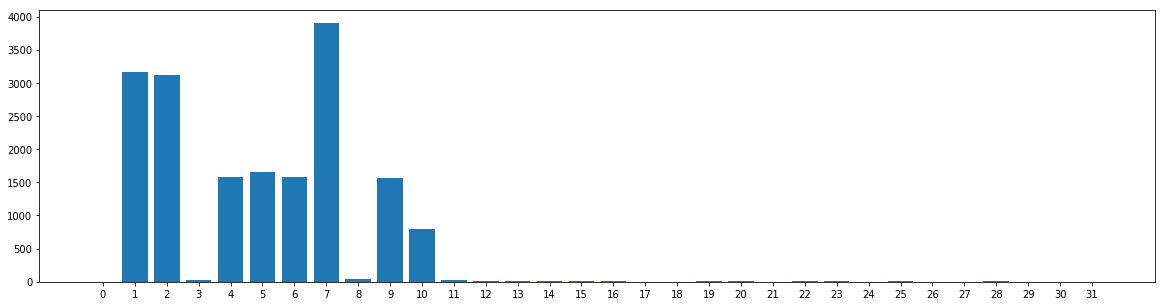

In [22]:
plt.figure(figsize=(20,5))
plt.bar(range(len(counts)), counts.values(), align='center')
plt.xticks(range(len(counts)))
plt.show()

### Multiple Ants
The 'multiple_ants' funciton is just like the 'run_ant' function, but it has the ability to simulate multiple ants. It takes in a list of the current positions for these ants and their current_direction. It then simulates them turn by turn in the order that they are specified in the dict.

In [23]:
def multiple_ants(space, current_position, num_times, current_direction = direction.NORTH):
    ones = 0
    for _ in range(num_times):
        for ant in current_position:
            if space[ant[0]][ant[1]]%2 == 1:
                space[ant[0]][ant[1]] = 0
                ant, current_direction = get_next_coords(ant, current_direction, next_direction.LEFT)
            elif space[ant[0]][ant[1]]%2 == 0:
                space[ant[0]][ant[1]] = 1
                ant, current_direction = get_next_coords(ant, current_direction, next_direction.RIGHT)
    return space

#### Visualizing Multiple Ants
These lines of code simulate 3 ants, two with the same position as the center and one 100, 100 away from it. As we can see the uniformally generated pattern is destroyed and the generated pattern looks very random.

In [32]:
start, space = initialize(space)
current_position = [[2600, 2600], start, start]
space = multiple_ants(space, current_position, 500000)

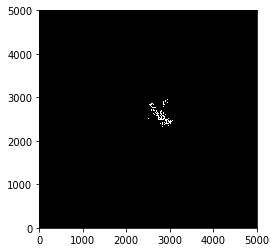

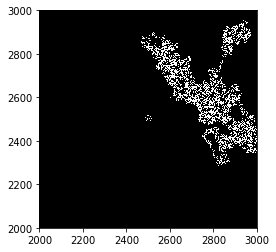

In [34]:
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([0, 5000, 0, 5000])
plt.show()
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([2000, 3000, 2000, 3000])
plt.show()

In [71]:
def multiple_ants_unique_direction(space, current_position, num_times, current_direction_list, wrap = 1):
    for count in range(num_times):
        for i, ant in enumerate(current_position):
            if wrap:
                for j, coord in enumerate(ant):
                    ant[j] = coord%(x_limit-1)
            if space[ant[0]][ant[1]] == 1:
                space[ant[0]][ant[1]] = 0
                ant, current_direction_list[i] = get_next_coords(ant, current_direction_list[i], next_direction.LEFT)
            elif space[ant[0]][ant[1]] == 0:
                space[ant[0]][ant[1]] = 1
                ant, current_direction_list[i] = get_next_coords(ant, current_direction_list[i], next_direction.RIGHT)
    return space
def multiple_ants_unique_direction_and_addition(space, current_position, num_times, current_direction_list, wrap = 1):
    for count in range(num_times):
        for i, ant in enumerate(current_position):
            if wrap:
                for j, coord in enumerate(ant):
                    ant[j] = coord%(x_limit-1)
            if space[ant[0]][ant[1]]%2 == 1:
                ant, current_direction_list[i] = get_next_coords(ant, current_direction_list[i], next_direction.LEFT)
            elif space[ant[0]][ant[1]]%2 == 0:
                ant, current_direction_list[i] = get_next_coords(ant, current_direction_list[i], next_direction.RIGHT)
            space[ant[0]][ant[1]] += 1
        if(count%10000000 == 0):
            print("10 million")
    return space

## Collision
The above 'multiple_ants_unique_direction' function is the same as the 'multiple_ants' function but here we can give each ant an unique direction. The code below starts them at 4 position on the extremes of the map and observes them as they collide. First contact seems to be made going from 114127 to 114128.

In [65]:
start, space = initialize(space)
current_position = [[500, 500], [500, 4500], [4500, 500], [4500, 4500]]
current_direction_list = [direction.SOUTH, direction.WEST, direction.EAST, direction.NORTH]
space = multiple_ants_unique_direction(space, current_position, 114127, current_direction_list)

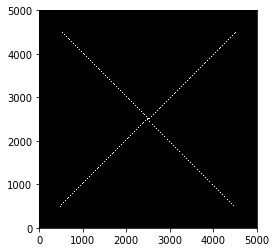

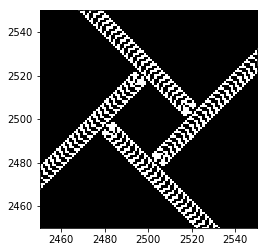

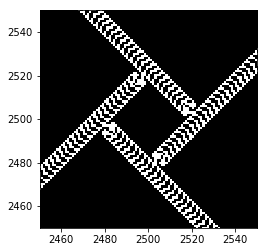

In [66]:
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([0, 5000, 0, 5000])
plt.show()
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([2450, 2550, 2450, 2550])
plt.show()
start, space = initialize(space)
current_position = [[500, 500], [500, 4500], [4500, 500], [4500, 4500]]
current_direction_list = [direction.SOUTH, direction.WEST, direction.EAST, direction.NORTH]
space = multiple_ants_unique_direction(space, current_position, 114128, current_direction_list)
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([2450, 2550, 2450, 2550])
plt.show()

The ants do not loop around in the center, but instead keep going and eventually exit out of the map. On reaching the edge, they turn to their right.

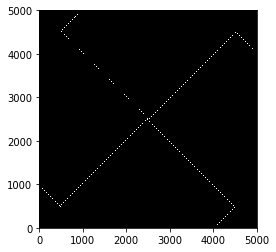

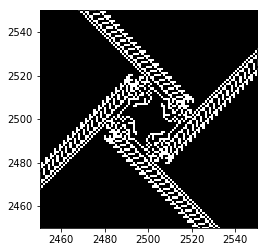

In [39]:
start, space = initialize(space)
current_position = [[500, 500], [500, 4500], [4500, 500], [4500, 4500]]
current_direction_list = [direction.SOUTH, direction.WEST, direction.EAST, direction.NORTH]
space = multiple_ants_unique_direction(space, current_position, 165000, current_direction_list)
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([0, 5000, 0, 5000])
plt.show()
plt.imshow(space,cmap='gist_gray', interpolation='nearest')
plt.axis([2450, 2550, 2450, 2550])
plt.show()

The above pattern was not very interesting, the code below uses the 'wrap' functionality to let the ants roam around, and visualzes them every 100 million steps, until 1 billion steps.

10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
After 100 million itertions


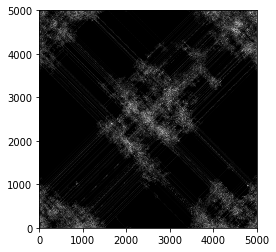

10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
10 million
After 200 million itertions


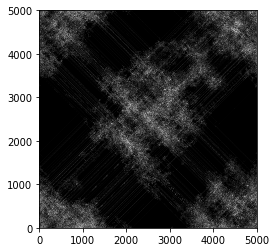

10 million


KeyboardInterrupt: 

In [72]:
start, space = initialize(space)
current_position = [[500, 500], [500, 4500], [4500, 500], [4500, 4500]]
current_direction_list = [direction.SOUTH, direction.WEST, direction.EAST, direction.NORTH]
for i in range (1, 11):
    space = multiple_ants_unique_direction_and_addition(space, current_position, 100000000, current_direction_list, wrap = 1)
    print("After {0}00 million itertions".format(i))
    plt.imshow(space,cmap='gist_gray', interpolation='nearest')
    plt.axis([0, 5000, 0, 5000])
    plt.show()

Visualizing the space like this produces an interesting visual where the ants seem to traverse the same 'high_ways' which seem to disperse and reappear as the ants move on them. They also maintain their symmetry in regards to usually moving in same diagonal directions. This is better visualized on a color plot with density as shown below.

In [ ]:
start, space = initialize(space)
current_position = [[500, 500], [500, 4500], [4500, 500], [4500, 4500]]
current_direction_list = [direction.SOUTH, direction.WEST, direction.EAST, direction.NORTH]
for i in range (1, 11):
    space = multiple_ants_unique_direction_and_addition(space, current_position, 100000000, current_direction_list, wrap = 1)
    print("After {0}00 million itertions".format(i))
    plt.imshow(space,cmap='gist_heat_r', interpolation='nearest')
    plt.axis([0, 5000, 0, 5000])
    plt.show()